# Car sales Prediction

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
dataset = pd.read_csv("car_purchasing.csv",encoding='ISO-8859-1')

In [86]:
dataset.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [87]:
dataset.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [88]:
dataset.shape

(500, 9)

In [89]:
dataset.size

4500

## Exploratory Data Analysis:

### Missing values:

In [90]:
features_with_na = [column for column in dataset.columns if dataset[column].isnull().sum()>1]
if len(features_with_na)>0:
    for features in features_with_na:
        print(f"{features} contains {dataset[features].isnull().sum()/dataset.shape[0]}%.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


### Numerical features:

In [91]:
numerical_features = [column for column in dataset.columns if dataset[column].dtype != 'O']
numerical_features

['gender',
 'age',
 'annual Salary',
 'credit card debt',
 'net worth',
 'car purchase amount']

In [92]:
print(f"The total no of numerical faetures in the dataset : {len(numerical_features)}")

The total no of numerical faetures in the dataset : 6


In [93]:
dataset[numerical_features].head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [94]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [95]:
discrete_feature

['gender']

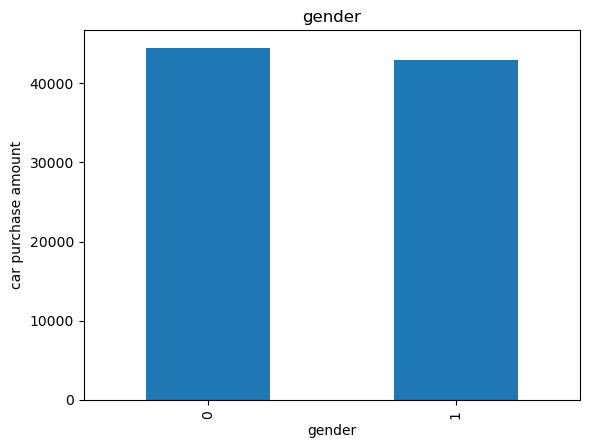

In [96]:
# Lets find the relationship between the gender and car purchases amount
dataset.groupby(discrete_feature[0])['car purchase amount'].median().plot.bar()
plt.xlabel(discrete_feature[0])
plt.ylabel('car purchase amount')
plt.title(discrete_feature[0])
plt.show()

From the above visualisation it was clear that there is no much difference between the car purchase amount for male and female customers.

### Continuous features:

In [97]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


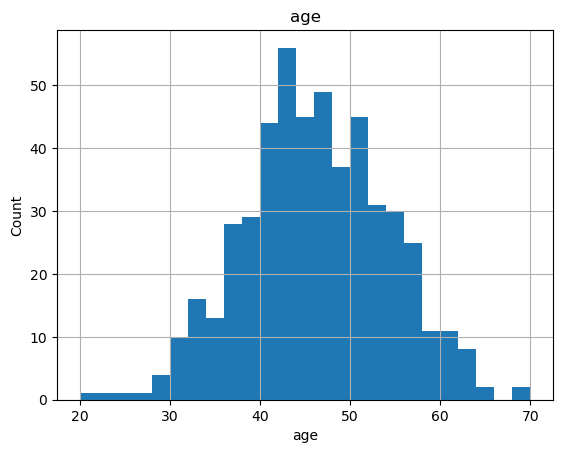

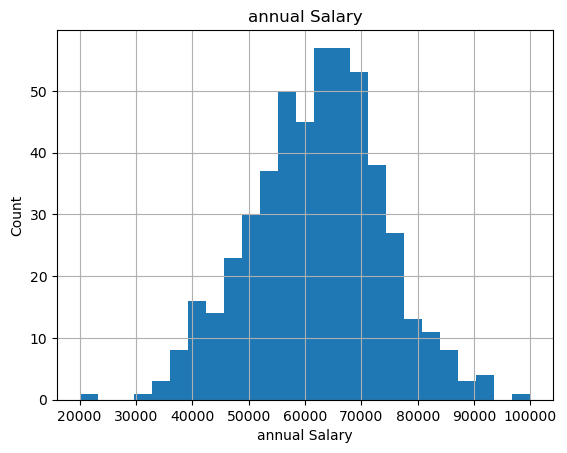

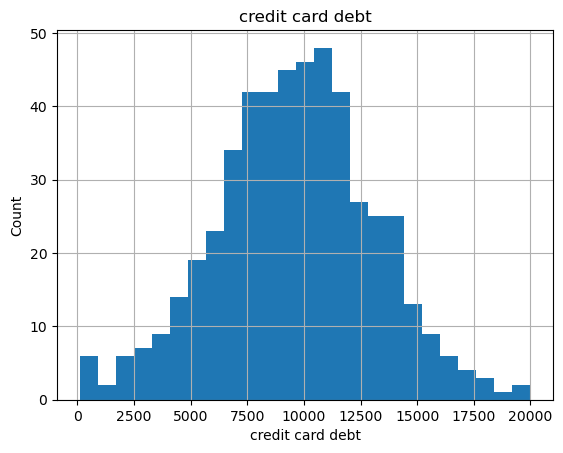

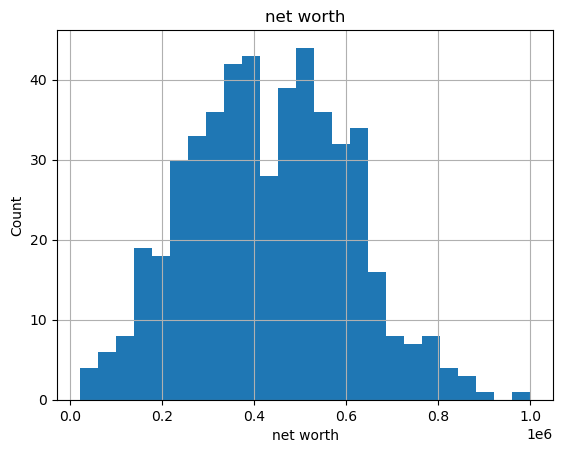

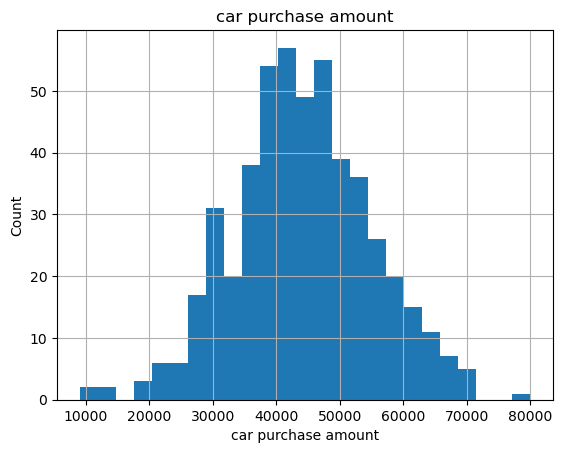

In [98]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Since the above features are not skewed and they are normally distributed we need not apply log transformations on the above features i.e `age,annual salary,credit card debt,net worth,car purchase amount`

### Outliers:

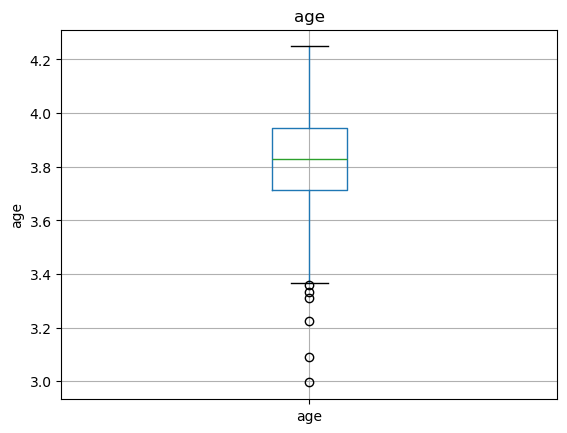

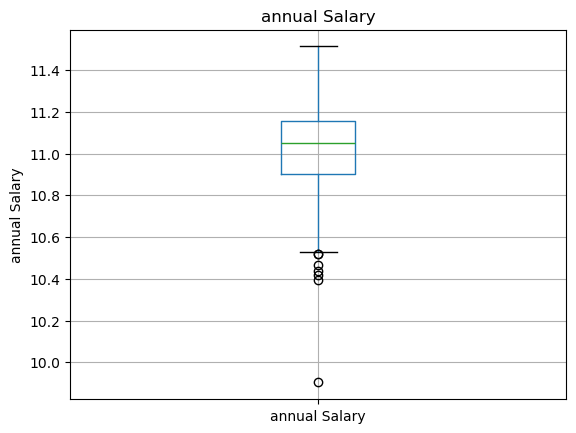

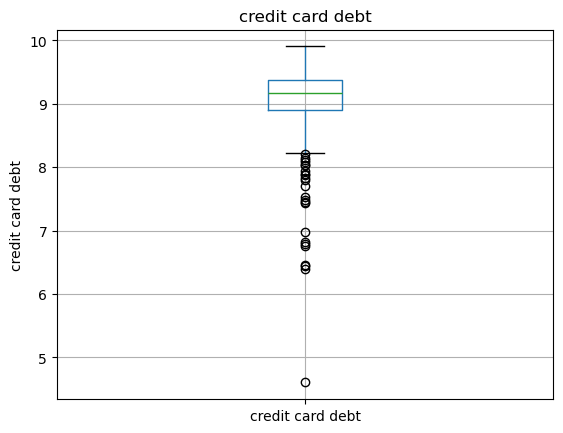

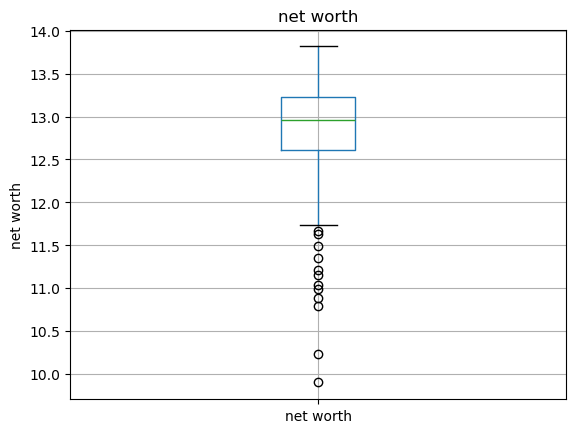

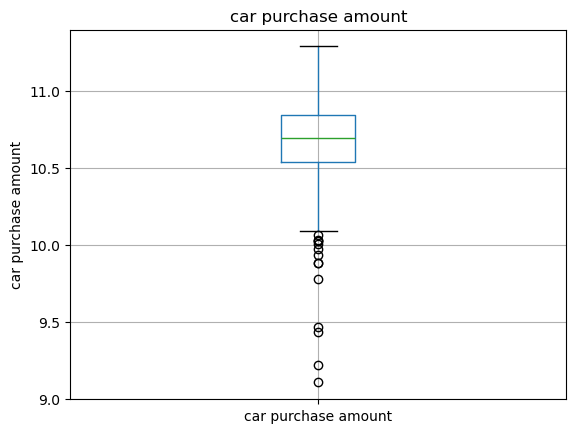

In [99]:
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

From the above box plot the continuous features namely `age,annual salary,credit card debt,net worth and car purchase` amount has outliers.

### Categorical features:

In [100]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['customer name', 'customer e-mail', 'country']

In [101]:
dataset[categorical_features].head()

,customer name,customer e-mail,country
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil


In [102]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is customer name and number of categories are 498
The feature is customer e-mail and number of categories are 500
The feature is country and number of categories are 211


In the above categorical features customer name , customer e-mail are not necessary for the model prediction. Hence we can remove those from the datset.

In [103]:
dataset = dataset.drop(columns=['customer name', 'customer e-mail'])
dataset.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [104]:
# Group by country and calculate the average car purchase amount
country_avg = dataset.groupby("country")["car purchase amount"].mean().sort_values(ascending=False)

# Select Top 10 and Bottom 10 Countries
top_10_countries = country_avg.head(10)
bottom_10_countries = country_avg.tail(10)

In [105]:
top_10_countries

country
Bonaire, Sint Eustatius and Saba    70878.296640
Nauru                               68678.435200
Cook Islands                        67422.363130
Korea, South                        65583.078025
Ukraine                             61404.225780
Trinidad and Tobago                 60526.977880
Liberia                             60501.843450
Moldova                             59758.732470
San Marino                          58918.727530
Denmark                             58350.318090
Name: car purchase amount, dtype: float64

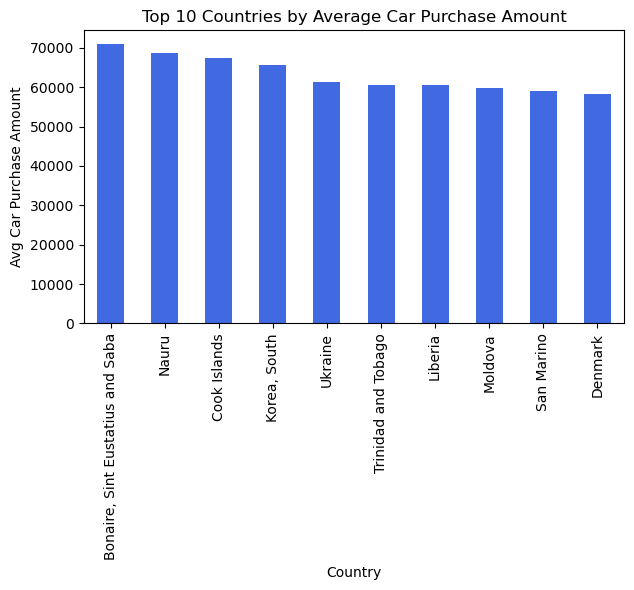

In [106]:
# Plot Bar Chart
plt.figure(figsize=(12, 6))

# Top 10
plt.subplot(1, 2, 1)
top_10_countries.plot(kind='bar', color='royalblue')
plt.title("Top 10 Countries by Average Car Purchase Amount")
plt.xlabel("Country")
plt.ylabel("Avg Car Purchase Amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [107]:
bottom_10_countries

country
Bangladesh                       29829.538935
Nicaragua                        28700.033400
Georgia                          28031.209850
Norfolk Island                   27923.365250
Virgin Islands, United States    27625.441440
Saudi Arabia                     27586.718540
Honduras                         26599.908430
Cameroon                         25971.956730
American Samoa                   24221.999370
Montenegro                       22599.458630
Name: car purchase amount, dtype: float64

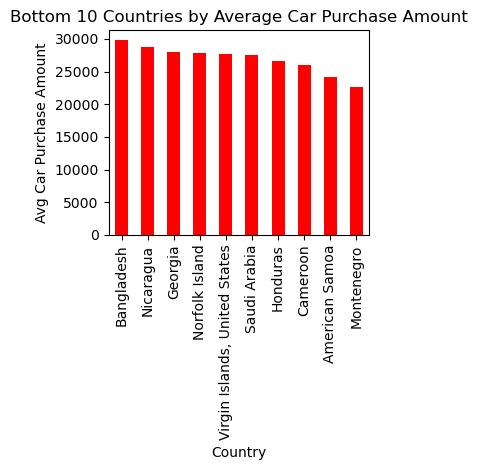

In [108]:
# Bottom 10
plt.subplot(1, 2, 2)
bottom_10_countries.plot(kind='bar', color='red')
plt.title("Bottom 10 Countries by Average Car Purchase Amount")
plt.xlabel("Country")
plt.ylabel("Avg Car Purchase Amount")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### `Final Insights for above visualization`

1. `Countries with the Highest Spending Power`

The top 10 countries by average car purchase amount include:
Bonaire, Sint Eustatius and Saba, Nauru, Cook Islands, South Korea, Ukraine, Trinidad and Tobago, Liberia, Moldova, San Marino, and Denmark.
These countries have an average car purchase amount exceeding $60,000, indicating a high spending capacity on automobiles.

2. `Countries with the Lowest Spending Power`

The bottom 10 countries include:
Bangladesh, Nicaragua, Georgia, Norfolk Island, Virgin Islands (US), Saudi Arabia, Honduras, Cameroon, American Samoa, and Montenegro.
Their average car purchase amount is below $30,000, indicating relatively lower spending power.

3. `Large Variations in Spending Within a Country`

Some countries, such as South Korea and San Marino, exhibit a wide range of car purchase amounts, likely due to diverse economic classes and luxury car purchases.
In contrast, Denmark and Moldova show a narrow spread, suggesting a more uniform car spending pattern.

4.️` Correlation with Economic Development (GDP per Capita)`

High-income nations tend to have higher car purchase amounts, but there are exceptions.
Some small nations, like Nauru and Cook Islands, show high car purchase amounts despite lower GDP, possibly due to unique economic structures or subsidies.
Countries like Bangladesh and Cameroon, which have relatively low GDP per capita, also show lower car spending.


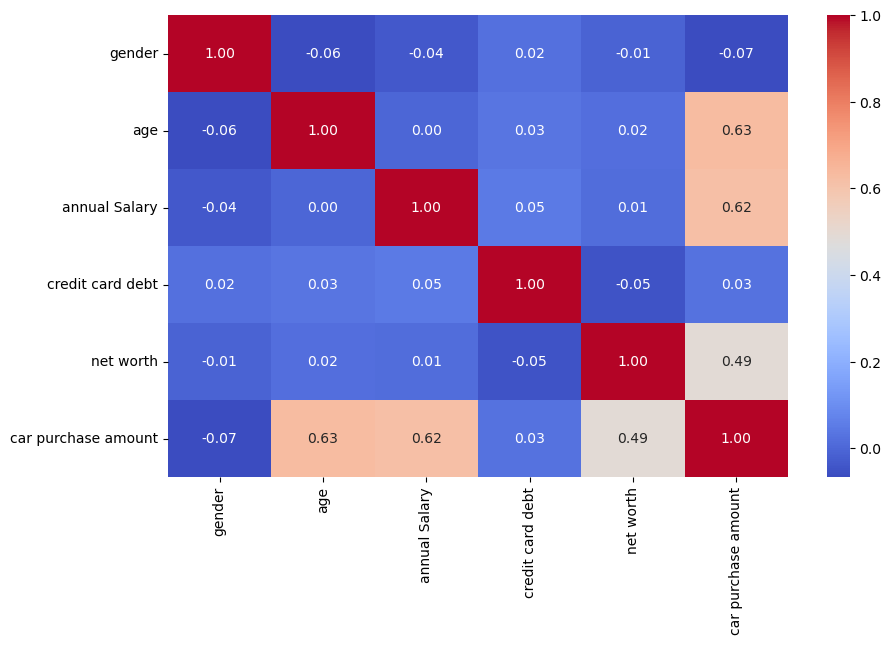

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


## Feature scaling:

In [110]:
# Convert the country column into numerical column
data= pd.get_dummies(dataset, columns=["country"], drop_first=True) 
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_Algeria,country_American Samoa,country_Andorra,country_Angola,...,country_Venezuela,country_Viet Nam,"country_Virgin Islands, British","country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
feature_scale=[feature for feature in data.columns]
print(feature_scale)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

['gender', 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount', 'country_Algeria', 'country_American Samoa', 'country_Andorra', 'country_Angola', 'country_Anguilla', 'country_Antarctica', 'country_Argentina', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Bahamas', 'country_Bahrain', 'country_Bangladesh', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Benin', 'country_Bermuda', 'country_Bhutan', 'country_Bolivia', 'country_Bonaire, Sint Eustatius and Saba', 'country_Bosnia and Herzegovina', 'country_Botswana', 'country_Bouvet Island', 'country_Brazil', 'country_Bulgaria', 'country_Cambodia', 'country_Cameroon', 'country_Canada', 'country_Cape Verde', 'country_Cayman Islands', 'country_Central African Republic', 'country_Chad', 'country_Chile', 'country_China', 'country_Christmas Island', 'country_Cocos (Keeling) Islands', 'country_Colombia', 'country_Congo (Brazzaville)', 'country_Cook Islands', 'country

MinMaxScaler()

In [112]:
scaler.transform(data[feature_scale])

array([[0.        , 0.4370344 , 0.53515116, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.41741247, 0.58308616, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.46305795, 0.42248189, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.67886994, 0.61110973, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.78321017, 0.37264988, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.53462305, 0.51713347, ..., 0.        , 1.        ,
        0.        ]])

In [113]:
data = pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)
                    

In [114]:
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,country_Algeria,country_American Samoa,country_Andorra,country_Angola,...,country_Venezuela,country_Viet Nam,"country_Virgin Islands, British","country_Virgin Islands, United States",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zimbabwe,country_marlal,country_Åland Islands
0,0.0,0.437034,0.535151,0.578361,0.223430,0.370725,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.417412,0.583086,0.476028,0.521402,0.508669,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.463058,0.422482,0.555797,0.631089,0.477827,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.765427,0.742125,0.719908,0.539387,0.822850,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.746275,0.496614,0.264257,0.551331,0.660781,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature selection:

In [115]:
X_train = data.drop(columns=["car purchase amount"])

In [116]:
y_train = data[["car purchase amount"]]

In [117]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [118]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [119]:
feature_sel_model.get_support()

array([False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [120]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(selected_feat == 0)))

total features: 215
selected features: 3
features with coefficients shrank to zero: 0


In [121]:
selected_feat

Index(['age', 'annual Salary', 'net worth'], dtype='object')

In [122]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X_train,y_train,random_state=42,test_size=0.3)

In [123]:
len(X_train),len(y_train),len(x_test),len(y_test)

(350, 350, 150, 150)

## Linear Regression :

In [124]:
X_train = X_train[['age', 'annual Salary', 'net worth']]

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [126]:
model.fit(X_train,y_train)

LinearRegression()

In [127]:
model.coef_,model.intercept_

(array([[0.59265113, 0.63361542, 0.40005698]]), array([-0.3167591]))

In [128]:
model.score(X_train,y_train)

0.9999999811175979

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [138]:
x_test = x_test[['age', 'annual Salary', 'net worth']]

In [139]:
y_pred = model.predict(x_test)  # Predictions from Linear Regression model

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
R² Score: 1.0000


In [140]:
print(f"Train score: {model.score(X_train,y_train)}")
print(f"Test score  : {model.score(x_test,y_test)}")

Train score: 0.9999999811175979
Test score  : 0.9999999811306521


The model was trained very well and achieved a very good R^2 score. The model has no error too. Since both the training and testing score was very high that is 0.99 -----> Model is not overfitting or underfitting. Hence the model is ready for deployment.

In [141]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully as model.pkl!")

✅ Model saved successfully as model.pkl!


In [142]:
X_train.iloc[0]

age              0.736498
annual Salary    0.606248
net worth        0.416822
Name: 5, dtype: float64

### Polynomial regression :

In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(x_test)

In [60]:
X_train_poly,X_test_poly

(array([[1.        , 0.73649786, 0.60624815, ..., 0.36753681, 0.25269744,
         0.17374041],
        [1.        , 0.46062138, 0.61468993, ..., 0.3778437 , 0.19174651,
         0.0973067 ],
        [1.        , 0.70550285, 0.63484097, ..., 0.40302306, 0.54020682,
         0.72408613],
        ...,
        [1.        , 0.50611883, 0.54451307, ..., 0.29649448, 0.32671875,
         0.36002404],
        [1.        , 0.75948586, 0.26761617, ..., 0.07161842, 0.10959127,
         0.16769775],
        [1.        , 0.20984707, 0.60361478, ..., 0.3643508 , 0.23680012,
         0.15390194]]),
 array([[1.        , 0.32253835, 0.68025128, ..., 0.46274181, 0.36882415,
         0.29396793],
        [1.        , 0.55579459, 0.48924014, ..., 0.23935591, 0.22657103,
         0.21446903],
        [1.        , 0.74269152, 0.59690479, ..., 0.35629533, 0.38809678,
         0.4227367 ],
        ...,
        [1.        , 0.54901898, 0.51329195, ..., 0.26346863, 0.25640666,
         0.24953398],
        [1. 

In [61]:
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred_poly = model_poly.predict(x_test)

# Evaluate Model Performance
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print Performance Metrics
print(f"Polynomial Regression (Degree 2) Performance:")
print(f"MAE: {mae_poly:.2f}")
print(f"MSE: {mse_poly:.2f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"R² Score: {r2_poly:.4f}")

Polynomial Regression (Degree 2) Performance:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R² Score: 1.0000


In [63]:
print("Actual Values (y_test):", y_test[:10])
print("Predicted Values (y_pred_poly):", y_pred_poly[:10])


Actual Values (y_test):      car purchase amount
361             0.522293
73              0.507872
374             0.761688
155             0.321651
104             0.724806
394             0.762536
377             0.612364
124             0.644443
68              0.615605
450             0.547462
Predicted Values (y_pred_poly): [[0.52231745]
 [0.50789287]
 [0.76171581]
 [0.32166273]
 [0.72480363]
 [0.76250972]
 [0.61239658]
 [0.64447489]
 [0.61559422]
 [0.54745501]]


In [64]:
if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
    y_test = y_test.values.ravel()  # Converts it to a 1D NumPy array

# Ensure Predictions Are Also 1D
if isinstance(y_pred_poly, pd.Series) or isinstance(y_pred_poly, pd.DataFrame):
    y_pred_poly = y_pred_poly.flatten()

# Check values again
print("Min y_test:", min(y_test))
print("Max y_test:", max(y_test))

Min y_test: 0.12090943140845073
Max y_test: 0.854499634084507


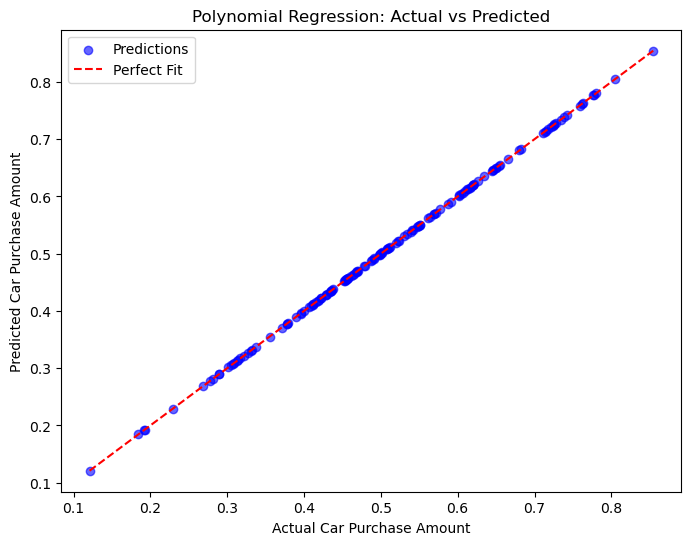

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_poly, alpha=0.6, color="blue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Car Purchase Amount")
plt.ylabel("Predicted Car Purchase Amount")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.legend()
plt.show() 

`Final Insights to Include in Notebook:`

1. Polynomial Regression (Degree 2) significantly outperformed Linear Regression.
2. The R² Score improved from a negative value to 1,0, meaning the model explains almost all variance in car purchase amounts.
3. Error metrics (MAE, MSE, RMSE) reduced drastically, confirming that the new model is much better at predictions.
4. Polynomial terms helped capture non-linear relationships between features and car purchase amount.
5. A degree higher than 2 may cause overfitting, so further fine-tuning (e.g., Ridge Regression) could be tested.

In [68]:
# feature_names = poly.get_feature_names_out(X_train.columns)

# # Get absolute coefficient values (higher = more important)
# importance = np.abs(model_poly.coef_).flatten()  


# # Create DataFrame for visualization
# feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importance})
# feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# # Display top 10 features
# print(feature_importance_df.head(10))

### Rigde regression:

In [69]:
from sklearn.linear_model import Ridge

# Apply Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(X_train_poly, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test_poly)

# Evaluate
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score (Ridge Regression): {r2_ridge:.4f}")

R² Score (Ridge Regression): 0.9950


In [70]:
train_r2 = ridge_model.score(X_train_poly, y_train)
test_r2 = ridge_model.score(X_test_poly, y_test)

print(f"Train R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Train R² Score: 0.9911
Test R² Score: 0.9950


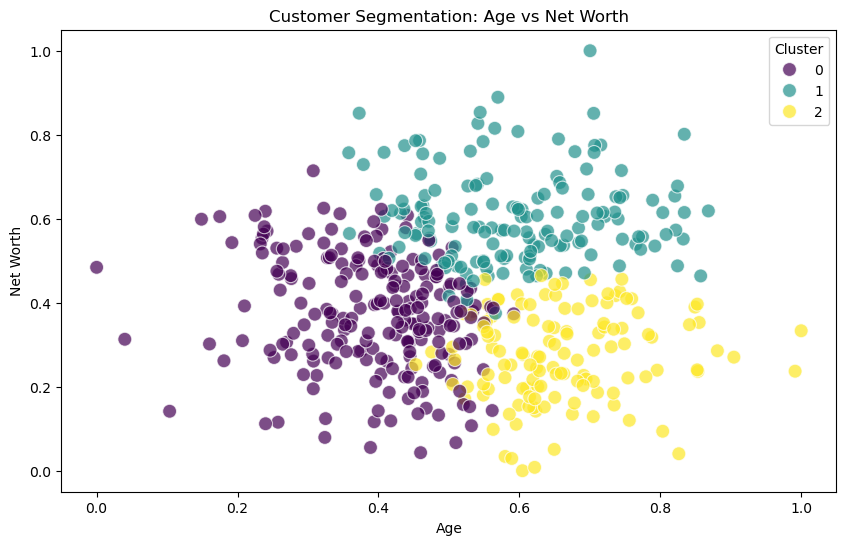

In [71]:
features = data[['age', 'net worth', 'car purchase amount']]

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualizing the Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['age'], y=data['net worth'], hue=data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Net Worth")
plt.title("Customer Segmentation: Age vs Net Worth")
plt.legend(title="Cluster")
plt.show()

/var/folders/66/gkzwfkrd4h3dk59w4k_154qc0000gn/T/ipykernel_6864/1156403928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Cluster'], y=data['car purchase amount'], palette='coolwarm')


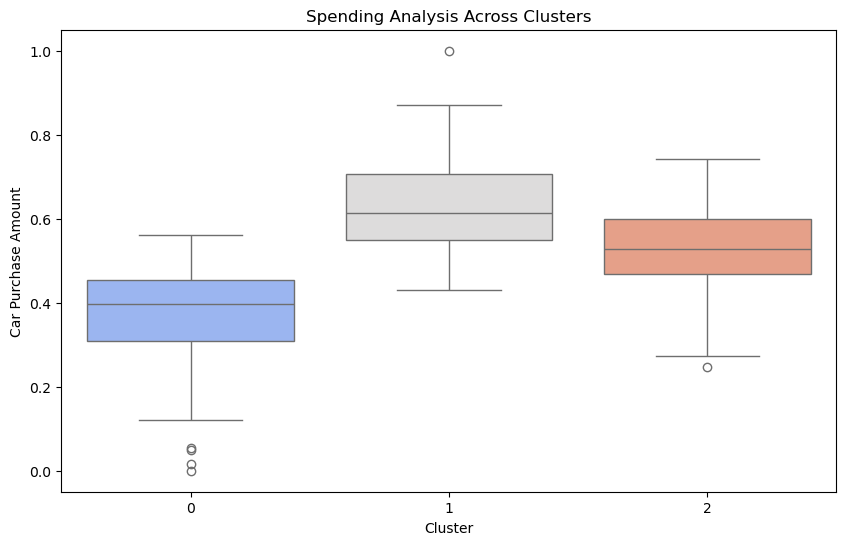

In [72]:
# High vs Low Spending Customers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Cluster'], y=data['car purchase amount'], palette='coolwarm')
plt.xlabel("Cluster")
plt.ylabel("Car Purchase Amount")
plt.title("Spending Analysis Across Clusters")
plt.show()

## `Insights from Customer Segmentation and Spending Analysis:`

1. `Customer Segmentation (Age vs. Net Worth):`
The scatter plot shows three distinct clusters of customers based on their age and net worth.


Cluster 0 (Purple): Customers with lower net worth, predominantly younger individuals.

Cluster 1 (Teal): Customers with mid-range net worth, distributed across different age groups.

Cluster 2 (Yellow): Customers with higher net worth, mostly older individuals.

This segmentation helps businesses understand customer groups for targeted marketing strategies.

2. `Spending Analysis Across Clusters:`
The boxplot indicates variations in car purchase amounts across different clusters.


Cluster 0: Lower spending customers, likely younger individuals with lower net worth.

Cluster 1: Highest variance in spending, indicating mixed purchasing power.

Cluster 2: Generally higher spending customers, possibly representing wealthy individuals.

Outliers in Cluster 1 suggest the presence of high-spending individuals within a mid-range income group.
    
3. `Business Implications:`
Businesses can tailor their marketing efforts based on these customer segments.

Higher net-worth individuals (Cluster 2) should be targeted with premium products.

Cluster 0 customers might respond better to financing options or entry-level vehicles.

Promotions and incentives can be customized to maximize conversion rates within each segment.

In [206]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(ridge_model, file)

print("✅ Model saved successfully as model.pkl!")

✅ Model saved successfully as model.pkl!


In [207]:
encoder = OneHotEncoder(handle_unknown='ignore')
pickle.dump(encoder, open("encoder.pkl", "wb"))

NameError: name 'OneHotEncoder' is not defined

In [209]:
pickle.dump(list(data.columns), open("features.pkl", "wb"))

print("✅ Model and Feature Names Saved!")

✅ Model and Feature Names Saved!
